# COVID-19 data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bar_chart_race as bcr
import ffmpeg
import matplotlib.animation as animation
pd.set_option('max_colwidth', 400)

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Extracting the data

In [3]:
# Reading the data into a Pandas DataFrame
df = pd.read_csv('Resources\md_covid19_viz.csv')
df.head()

,ReportDate,TotalCases,CaseDelta,TotalTests,TestsDelta,PosTestPercent,PosPercentDiff,NegativeTests,NegDelta,bedsTotal,...,pDeathAfrAmer,pDeathWhite,pDeathHispanic,pDeathAsian,pDeathOther,pDeathNotAvail,adultacutehospitalizations,adulticuhospitalizations,pedacutehospitalizations,pedicuhospitalizations
0,4-Mar-20,0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
1,5-Mar-20,3,3,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,6-Mar-20,3,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
3,7-Mar-20,3,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
4,8-Mar-20,5,2,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0


# Data cleaning and Analysis

In [4]:
df.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 159 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    ReportDate                  object 
 1    TotalCases                  int64  
 2    CaseDelta                   int64  
 3    TotalTests                  float64
 4    TestsDelta                  float64
 5    PosTestPercent              float64
 6    PosPercentDiff              float64
 7    NegativeTests               float64
 8    NegDelta                    int64  
 9    bedsTotal                   int64  
 10   bedsAcute                   int64  
 11   bedsICU                     int64  
 12   bedsDelta                   int64  
 13   total_hospitalized          float64
 14   hospitalizedDelta           int64  
 15   total_released              float64
 16   releasedDelta               int64  
 17   ALLE                        int64  
 18   ANNE                        int64  
 19   BALT

In [5]:
#saving file
df.to_csv("Output/cleaned_data.csv", index = False)
df.tail()

,ReportDate,TotalCases,CaseDelta,TotalTests,TestsDelta,PosTestPercent,PosPercentDiff,NegativeTests,NegDelta,bedsTotal,...,pDeathAfrAmer,pDeathWhite,pDeathHispanic,pDeathAsian,pDeathOther,pDeathNotAvail,adultacutehospitalizations,adulticuhospitalizations,pedacutehospitalizations,pedicuhospitalizations
1556,7-Jun-24,1455423,106,NaN,NaN,NaN,NaN,NaN,0,45,...,105.0,142.0,20.0,12.0,2.0,0,40,2,2,1
1557,8-Jun-24,1455517,94,NaN,NaN,NaN,NaN,NaN,0,40,...,105.0,142.0,20.0,12.0,2.0,0,36,2,1,1
1558,9-Jun-24,1455564,47,NaN,NaN,NaN,NaN,NaN,0,43,...,NaN,NaN,NaN,NaN,NaN,0,39,2,1,1
1559,10-Jun-24,1455607,43,NaN,NaN,NaN,NaN,NaN,0,44,...,NaN,NaN,NaN,NaN,NaN,0,40,2,1,1
1560,11-Jun-24,1455777,170,NaN,NaN,NaN,NaN,NaN,0,56,...,105.0,142.0,20.0,12.0,2.0,0,51,3,1,1


In [6]:
# changing to datetime format
df['ReportDate'] = pd.to_datetime(df['ReportDate'])

df['month'] = df['ReportDate'].dt.month
df['year'] = df['ReportDate'].dt.year

df.head()

,ReportDate,TotalCases,CaseDelta,TotalTests,TestsDelta,PosTestPercent,PosPercentDiff,NegativeTests,NegDelta,bedsTotal,...,pDeathHispanic,pDeathAsian,pDeathOther,pDeathNotAvail,adultacutehospitalizations,adulticuhospitalizations,pedacutehospitalizations,pedicuhospitalizations,month,year
0,2020-03-04,0,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,3,2020
1,2020-03-05,3,3,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,3,2020
2,2020-03-06,3,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,3,2020
3,2020-03-07,3,0,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,3,2020
4,2020-03-08,5,2,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,3,2020


### Generating general maryland overview

In [19]:
# creating summary dataframe 
covid_summary_df = df[["ReportDate", "year","month","TotalCases", "TotalTests","PosTestPercent","NegativeTests","total_hospitalized","genMale","genFemale","genUnkn","deaths"]]
covid_summary_df= covid_summary_df.fillna(0)
covid_summary_df.tail()

,ReportDate,year,month,TotalCases,TotalTests,PosTestPercent,NegativeTests,total_hospitalized,genMale,genFemale,genUnkn,deaths
1556,2024-06-07,2024,6,1455423,0.0,0.0,0.0,0.0,660882,794541,0,17742.0
1557,2024-06-08,2024,6,1455517,0.0,0.0,0.0,0.0,660919,794598,0,17742.0
1558,2024-06-09,2024,6,1455564,0.0,0.0,0.0,0.0,660936,794628,0,0.0
1559,2024-06-10,2024,6,1455607,0.0,0.0,0.0,0.0,660955,794652,0,0.0
1560,2024-06-11,2024,6,1455777,0.0,0.0,0.0,0.0,661020,794757,0,17743.0


In [21]:
#saving to file
covid_summary_df.to_csv('output/covid_summary.csv',index = False)

In [23]:
# creating summary dataframe
covid_summary_df = df[["ReportDate","year","month", "CaseDelta", "TestsDelta","PosTestPercent","NegativeTests","total_hospitalized","genMale","genFemale","genUnkn","deaths"]]
covid_summary_df.head()

,ReportDate,year,month,CaseDelta,TestsDelta,PosTestPercent,NegativeTests,total_hospitalized,genMale,genFemale,genUnkn,deaths
0,2020-03-04,2020,3,0,0.0,0.0,0.0,0.0,0,0,0,0.0
1,2020-03-05,2020,3,3,0.0,0.0,0.0,0.0,0,0,0,0.0
2,2020-03-06,2020,3,0,0.0,0.0,0.0,0.0,0,0,0,0.0
3,2020-03-07,2020,3,0,0.0,0.0,0.0,0.0,0,0,0,0.0
4,2020-03-08,2020,3,2,0.0,0.0,0.0,0.0,0,0,0,0.0


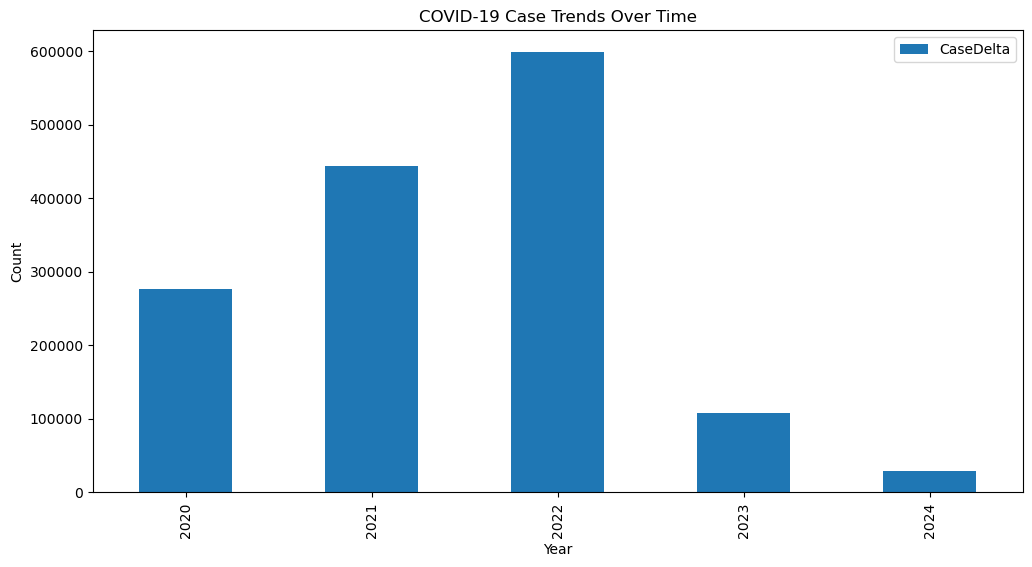

In [26]:
# Exclude datetime columns from the sum operation
numerical_columns = ['CaseDelta']  # Add other numerical columns as needed
grouped_data = covid_summary_df.groupby('year')[numerical_columns].sum()
# Creating a bar chart for TotalCases and TotalTests
grouped_data.plot(kind='bar', figsize=(12, 6))
plt.title('COVID-19 Case Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.savefig("output/casetrends_over_time.png")
plt.show()


In [27]:
import plotly.express as px
# Exclude datetime columns from the sum operation
numerical_columns = ['CaseDelta']  # Add other numerical columns as needed
grouped_data = covid_summary_df.groupby('year')[numerical_columns].sum().reset_index()
# Creating an interactive bar chart using Plotly
fig = px.bar(grouped_data, x='year', y=['CaseDelta'], title='COVID-19 Case Trends Over Time',
             labels={'year': 'Year', 'value': 'Count'}, barmode='group')
plt.savefig("output/INTcasetrends_over_time.png")
fig.show()

<Figure size 640x480 with 0 Axes>

In [28]:
# Exclude datetime columns from the sum operation
numerical_columns = ['TestsDelta']  # Add other numerical columns as needed
grouped_data = covid_summary_df.groupby('year')[numerical_columns].sum().reset_index()
# Creating an interactive bar chart using Plotly
fig = px.bar(grouped_data, x='year', y=['TestsDelta'], title='COVID-19 Testing Trend Over Time',
             labels={'year': 'Year', 'value': 'Count'}, barmode='group')
plt.savefig("output/testing_trends_over_time.png")
fig.show()

<Figure size 640x480 with 0 Axes>

### Maryland case and death trend by age

In [9]:
#creating an age analysis dataframe
cases_age_df = df[['ReportDate',"year","month",'case0to9','case10to19','case20to29','case30to39','case40to49','case50to59','case60to69','case70to79','case80plus','caseAgeUnknown']]
cases_age_df.tail(5)

,ReportDate,year,month,case0to9,case10to19,case20to29,case30to39,case40to49,case50to59,case60to69,case70to79,case80plus,caseAgeUnknown
1556,2024-06-07,2024,6,142105,166942,233541,240351,201249,195770,142181,81952,51332,0
1557,2024-06-08,2024,6,142114,166948,233553,240363,201262,195781,142190,81965,51341,0
1558,2024-06-09,2024,6,142119,166948,233557,240366,201263,195792,142194,81979,51346,0
1559,2024-06-10,2024,6,142126,166950,233559,240369,201266,195798,142200,81984,51355,0
1560,2024-06-11,2024,6,142147,166963,233578,240390,201284,195819,142223,82011,51362,0


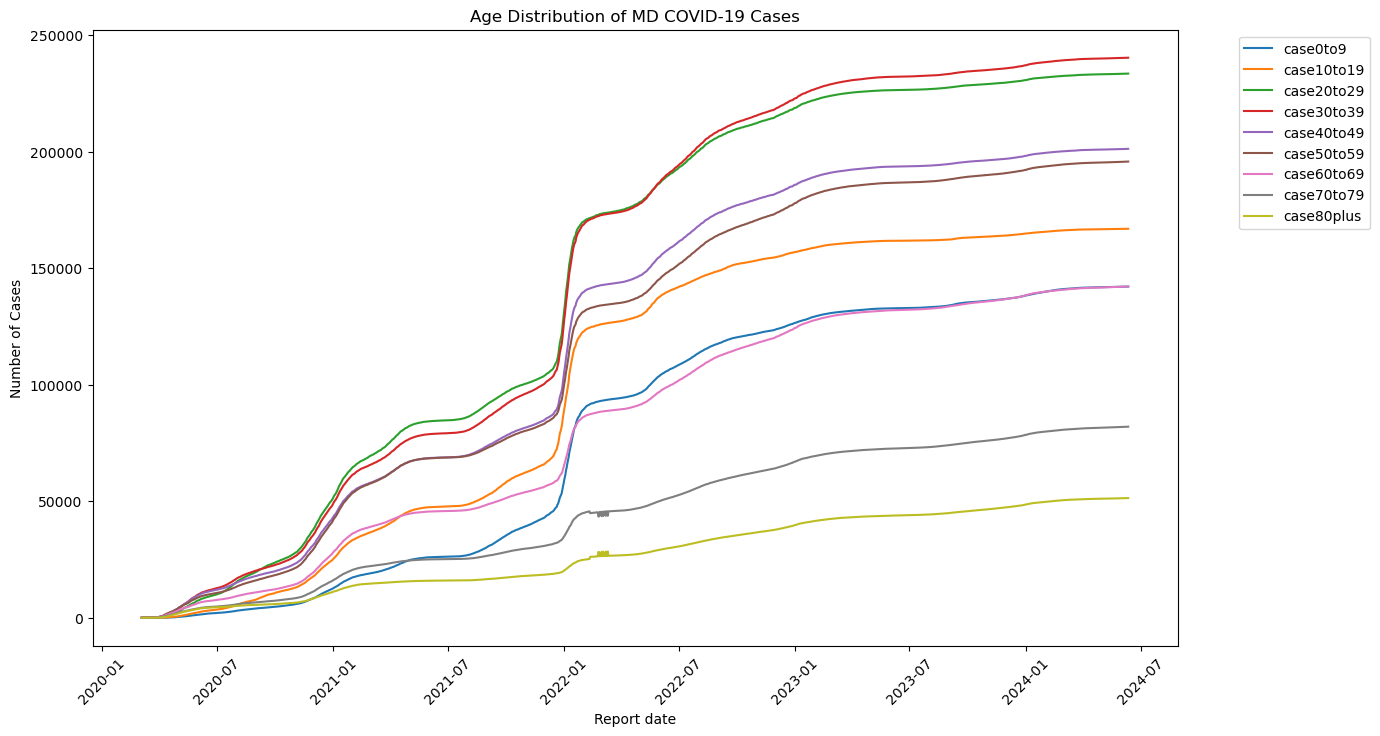

In [30]:
fig, ax = plt.subplots(figsize=(14, 8))
# Plotting each age group's COVID-19 cases
case_ages = ['case0to9', 'case10to19', 'case20to29', 'case30to39', 'case40to49', 'case50to59', 'case60to69', 'case70to79', 'case80plus']
for cases in case_ages:
    ax.plot(cases_age_df['ReportDate'], cases_age_df[cases], label=cases)
# Adding title and labels
plt.title('Age Distribution of MD COVID-19 Cases')
plt.xlabel('Report date')
plt.ylabel('Number of Cases')
# Set legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Rotate x-axis labels and set custom x-ticks
plt.xticks(rotation=45)
# Display the plot
plt.savefig("output/cases_by_age.png")
plt.show()

In [10]:
#saving file
cases_age_df.to_csv('output/casesby_age.csv',index = False)

In [34]:
#creating  the deaths df by age
deaths_age_df = df[['ReportDate',"year","month",'death0to9', 'death10to19', 'death20to29', 'death30to39', 'death40to49', 'death50to59', 'death60to69', 'death70to79', 'death80plus', 'deathAgeUnknown']]
deaths_age_df.tail(5)

,ReportDate,year,month,death0to9,death10to19,death20to29,death30to39,death40to49,death50to59,death60to69,death70to79,death80plus,deathAgeUnknown
1556,2024-06-07,2024,6,16.0,21.0,90.0,250.0,617.0,1484.0,2959.0,4385.0,7918.0,2
1557,2024-06-08,2024,6,16.0,21.0,90.0,250.0,617.0,1484.0,2959.0,4385.0,7918.0,2
1558,2024-06-09,2024,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1559,2024-06-10,2024,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1560,2024-06-11,2024,6,16.0,21.0,90.0,250.0,617.0,1484.0,2959.0,4385.0,7919.0,2


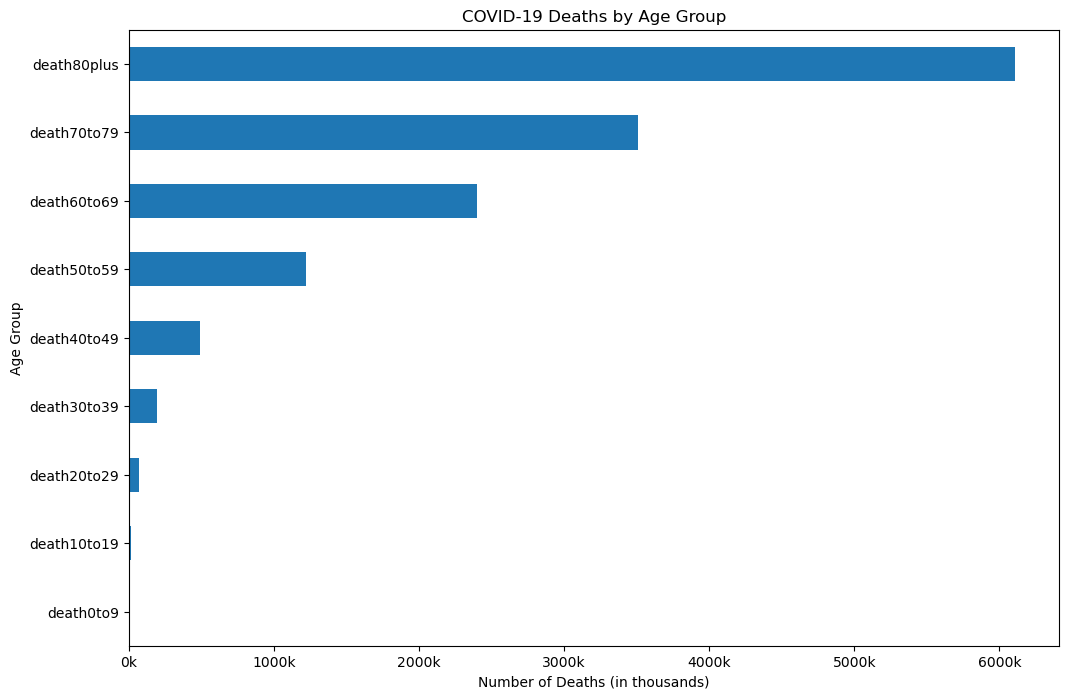

In [35]:
# Selecting the columns for plotting
selected_columns = ['death0to9', 'death10to19', 'death20to29', 'death30to39', 'death40to49',
                    'death50to59', 'death60to69', 'death70to79', 'death80plus']
# Assuming 'ReportDate' is the date column in your DataFrame
# Grouping by 'ReportDate' and summing the metrics for plotting
grouped_data = deaths_age_df[selected_columns].sum()
# Dividing the death counts by 1000 to show deaths in thousands
grouped_data_thousands = grouped_data / 1000
# Creating a horizontal bar chart
ax = grouped_data_thousands.plot(kind='barh', figsize=(12, 8))
plt.title('COVID-19 Deaths by Age Group')
plt.xlabel('Number of Deaths (in thousands)')
plt.ylabel('Age Group')
# Update the x-axis tick labels to show values in thousands with 'k' suffix
ax.set_xticklabels(['{:.0f}k'.format(x) for x in ax.get_xticks()])
plt.savefig("output/deaths_by_age.png")
plt.show()

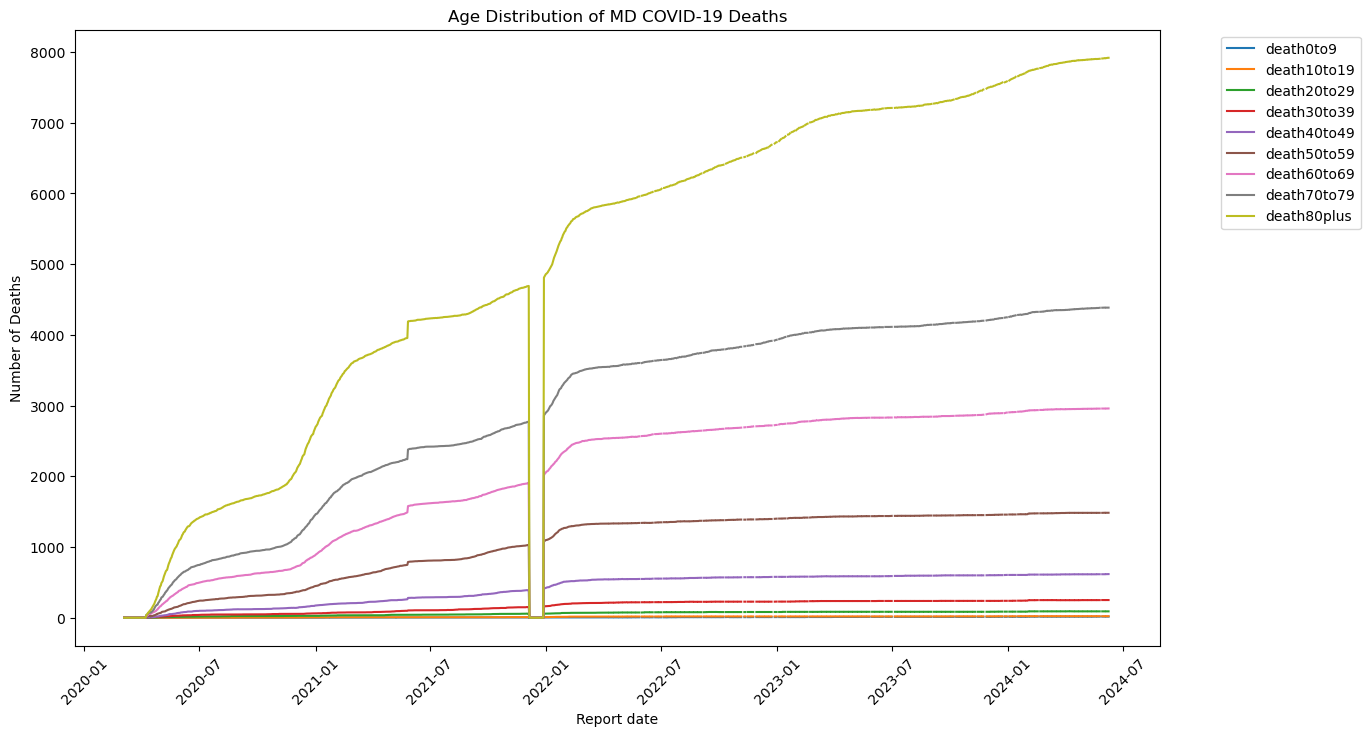

In [36]:
fig, ax = plt.subplots(figsize=(14, 8))
# Plotting each age group's COVID-19 cases
death_ages = ['death0to9', 'death10to19', 'death20to29', 'death30to39', 'death40to49','death50to59', 'death60to69', 'death70to79', 'death80plus']
for death in death_ages:
    ax.plot(deaths_age_df['ReportDate'], deaths_age_df[death], label=death)
# Adding title and labels
plt.title('Age Distribution of MD COVID-19 Deaths')
plt.xlabel('Report date')
plt.ylabel('Number of Deaths')
# Set legend outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Rotate x-axis labels and set custom x-ticks
plt.xticks(rotation=45)

# Display the plot
plt.savefig("output/deaths_by_age_over_time.png")
plt.show()

In [38]:
#saving to file
deaths_age_df=deaths_age_df.fillna(0)
deaths_age_df.to_csv('output/deathsby_age.csv',index = False)

### Maryland case and death trend by race

In [13]:
#creating race dataframe
Race_df = df[["ReportDate","caseAfrAmer", "caseWhite", "caseHispanic", "caseAsian", "caseOther", "caseNotAVail"]]
Race_df.tail()

,ReportDate,caseAfrAmer,caseWhite,caseHispanic,caseAsian,caseOther,caseNotAVail
1556,2024-06-07,494638,585018,173733,61254,72343,68437
1557,2024-06-08,494681,585061,173750,61261,72342,68422
1558,2024-06-09,494679,585061,173757,61264,72343,68460
1559,2024-06-10,494689,585063,173756,61260,72343,68496
1560,2024-06-11,494778,585154,173781,61277,72360,68427


In [14]:
Race_df.to_csv('output/casesby_race.csv', index = False)

In [15]:
#selecting first 200 datapoints for race
Race_df = Race_df.loc[(Race_df.index >= 0) & (Race_df.index < 200)]
Race_df

,ReportDate,caseAfrAmer,caseWhite,caseHispanic,caseAsian,caseOther,caseNotAVail
0,2020-03-04,0,0,0,0,0,0
1,2020-03-05,0,0,0,0,0,0
2,2020-03-06,0,0,0,0,0,0
3,2020-03-07,0,0,0,0,0,0
4,2020-03-08,0,0,0,0,0,0
...,...,...,...,...,...,...,...
195,2020-09-15,37451,28642,25852,2234,5418,17648
196,2020-09-16,37639,28864,25940,2249,5437,17759
197,2020-09-17,37823,29083,26042,2259,5463,17849
198,2020-09-18,37992,29269,26124,2266,5482,17929


In [16]:
#setting index to report date
Race_df= Race_df.set_index("ReportDate")
Race_df

,caseAfrAmer,caseWhite,caseHispanic,caseAsian,caseOther,caseNotAVail
ReportDate,,,,,,
2020-03-04,0,0,0,0,0,0
2020-03-05,0,0,0,0,0,0
2020-03-06,0,0,0,0,0,0
2020-03-07,0,0,0,0,0,0
2020-03-08,0,0,0,0,0,0
...,...,...,...,...,...,...
2020-09-15,37451,28642,25852,2234,5418,17648
2020-09-16,37639,28864,25940,2249,5437,17759
2020-09-17,37823,29083,26042,2259,5463,17849


In [ ]:
# Create the bar chart race
bcr.bar_chart_race(
    df=Race_df, 
    title='Covid Cases by Race', 
    orientation='h', 
    sort='desc', 
    n_bars=6, 
    steps_per_period=40, 
    period_length=2000
)


In [18]:
bcr.bar_chart_race(Race_df, 'finalcovid19.mp4', figsize=(5, 3))

KeyboardInterrupt: 

In [17]:
#renaming columns
Race_df= Race_df.rename(columns={"caseAfrAmer": "African-American", 
                                "caseWhite":"White",
                                "caseHispanic":"Hispanic",
                                "caseAsian": "Asian",
                                "caseOther":"Other",
                                "caseNotAVail": "Unknown"})

#Race_df= Race_df.set_index("ReportDate")
#Race_df=Race_df.transpose()

Race_df.tail()

,African-American,White,Hispanic,Asian,Other,Unknown
ReportDate,,,,,,
2020-09-15,37451,28642,25852,2234,5418,17648
2020-09-16,37639,28864,25940,2249,5437,17759
2020-09-17,37823,29083,26042,2259,5463,17849
2020-09-18,37992,29269,26124,2266,5482,17929
2020-09-19,38168,29498,26212,2272,5509,18085


In [20]:
#selecting race deaths data
death_race_df= df[["ReportDate","deathAfrAmer", "deathWhite", "deathHispanic", "deathAsian"]]
death_race_df= death_race_df.fillna(0)
death_race_df[["deathAfrAmer", "deathWhite", "deathHispanic", "deathAsian"]]= death_race_df[["deathAfrAmer", "deathWhite", "deathHispanic", "deathAsian"]].astype("int")

death_race_df.tail()

,ReportDate,deathAfrAmer,deathWhite,deathHispanic,deathAsian
1556,2024-06-07,5691,10178,1113,552
1557,2024-06-08,5692,10179,1113,552
1558,2024-06-09,0,0,0,0
1559,2024-06-10,0,0,0,0
1560,2024-06-11,5692,10179,1113,552


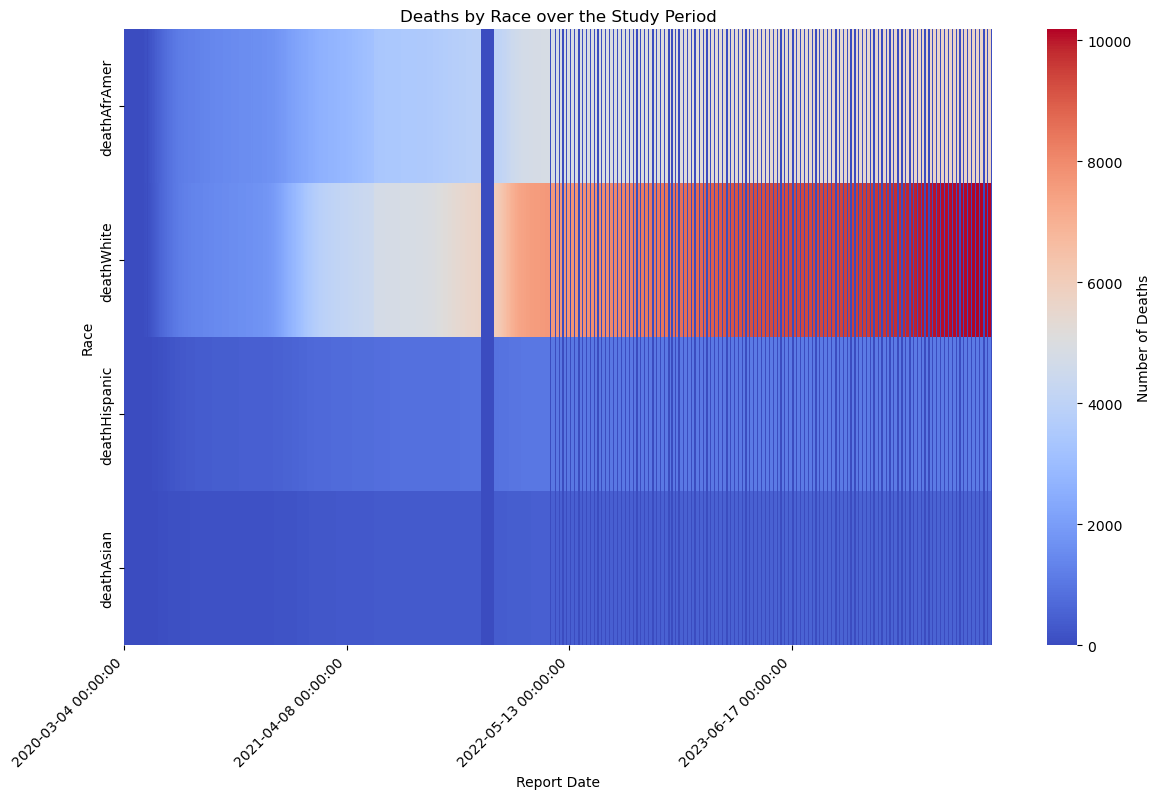

In [21]:

death_race_df = death_race_df.set_index('ReportDate')  # Set ReportDate as index

# Selecting only the race columns
Race = ['deathAfrAmer','deathWhite','deathHispanic', 'deathAsian']
data = death_race_df[Race]

# Creating the heatmap
fig, ax = plt.subplots(figsize=(14, 8))

sns.heatmap(data.T, ax=ax, cmap='coolwarm', cbar_kws={'label': 'Number of Deaths'})

# Adding title and labels
plt.title('Deaths by Race over the Study Period')
plt.xlabel('Report Date')
plt.ylabel('Race')

 #Setting custom x-ticks
xtick_labels = data.index[::400]  # Select every 400th date for labeling, adjust as needed
ax.set_xticks(range(0, len(data.index), 400))
ax.set_xticklabels(xtick_labels, rotation=45, ha='right')

plt.savefig("output/deathsby_race.png")
# Display the plot
plt.show()

In [22]:
#saving to file
death_race_df= death_race_df.fillna(0)
death_race_df.to_csv('output/deathsby_race.csv', index= False)

### Maryland case and death trend by gender

In [23]:
#creating dataframe for  cases by gender
cases_gender_df = df[['ReportDate','year','genMale', 'genFemale','genUnkn' ]]
cases_gender_df.tail()

,ReportDate,year,genMale,genFemale,genUnkn
1556,2024-06-07,2024,660882,794541,0
1557,2024-06-08,2024,660919,794598,0
1558,2024-06-09,2024,660936,794628,0
1559,2024-06-10,2024,660955,794652,0
1560,2024-06-11,2024,661020,794757,0


In [24]:
#saving to file
cases_gender_df.to_csv('output/casesby_gender.csv',index = False)

In [25]:
#creating dataframe for deaths by gender
death_gender_df= df[['ReportDate','year','deathGenMale', 'deathGenFemale', 'deathGenUnkn']]
death_gender_df.tail()

,ReportDate,year,deathGenMale,deathGenFemale,deathGenUnkn
1556,2024-06-07,2024,9268.0,8474.0,0
1557,2024-06-08,2024,9268.0,8474.0,0
1558,2024-06-09,2024,NaN,NaN,0
1559,2024-06-10,2024,NaN,NaN,0
1560,2024-06-11,2024,9268.0,8475.0,0


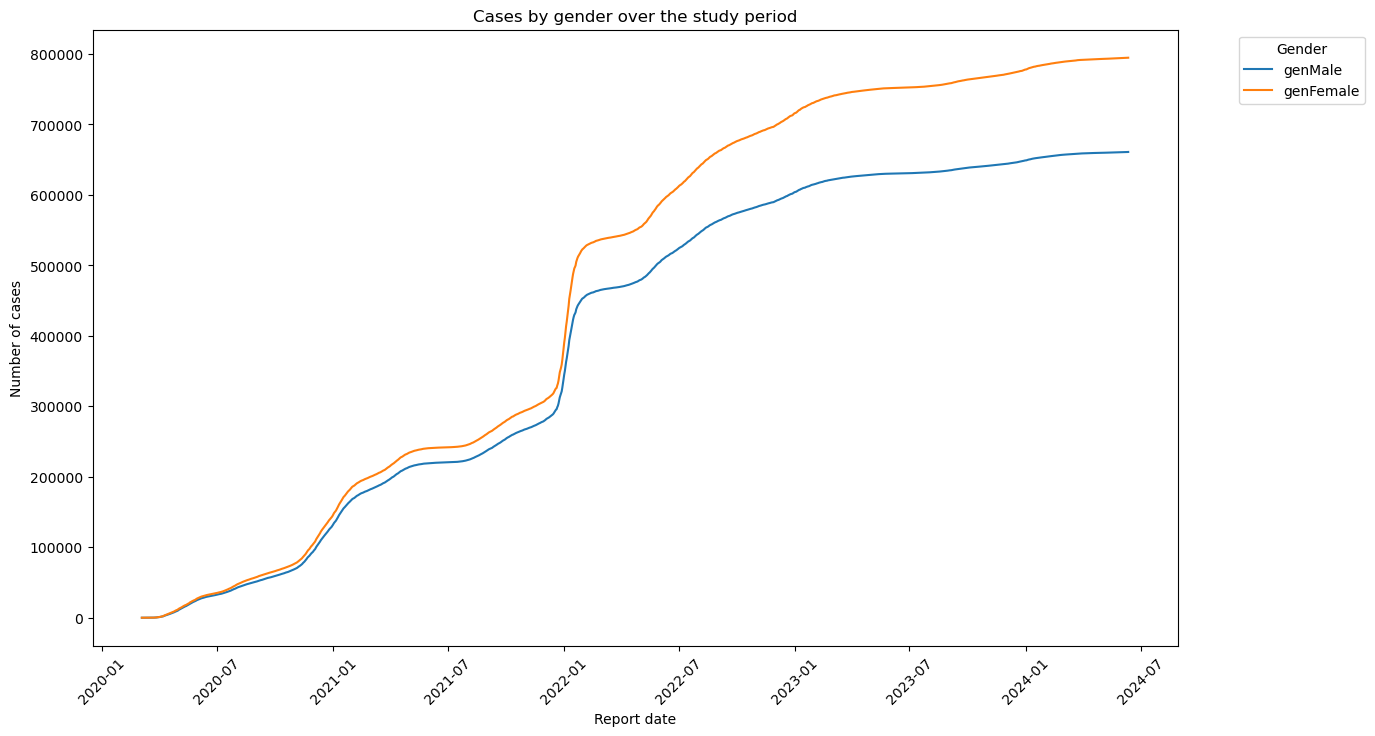

In [26]:
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting each county's death data
gender_type = ['genMale','genFemale']

for gender in gender_type:
    ax.plot(cases_gender_df['ReportDate'], cases_gender_df[gender], label=gender)

# Adding title and labels
plt.title('Cases by gender over the study period')
plt.xlabel('Report date')
plt.ylabel('Number of cases')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels and set custom x-ticks
plt.xticks(rotation=45)

plt.savefig("output/casesby_gender-line.png")
# Display the plot
plt.show()

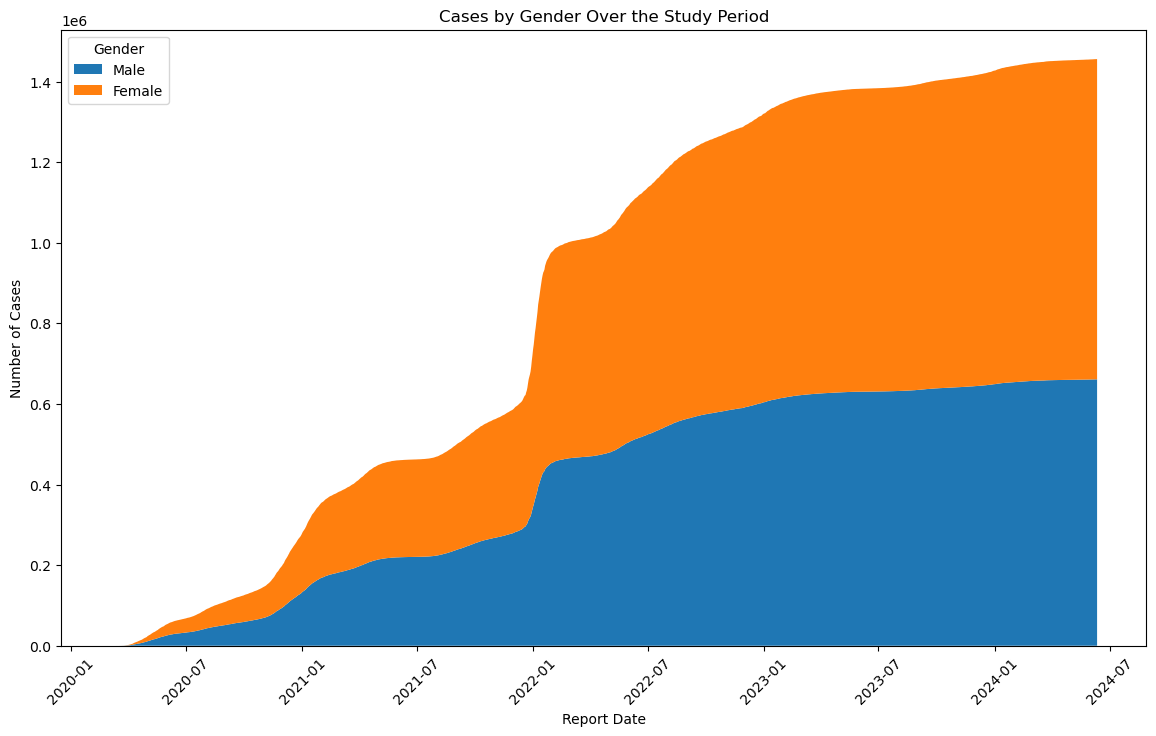

In [27]:

dates = cases_gender_df['ReportDate']
gen_male = cases_gender_df['genMale'].astype(int)  # Ensuring data is integer
gen_female = cases_gender_df['genFemale'].astype(int)  # Ensuring data is integer

# Creating a stacked area chart
fig, ax = plt.subplots(figsize=(14, 8))

ax.stackplot(dates, gen_male, gen_female, labels=['Male', 'Female'])

# Adding title and labels
plt.title('Cases by Gender Over the Study Period')
plt.xlabel('Report Date')
plt.ylabel('Number of Cases')
plt.legend(title='Gender', loc='upper left')

# Rotate x-axis labels
plt.xticks(rotation=45)

#Set y-axis to show only whole numbers
ax.yaxis.get_major_locator().set_params(integer=True)

plt.savefig("output/casesby_gender.png")
# Display the plot
plt.show()

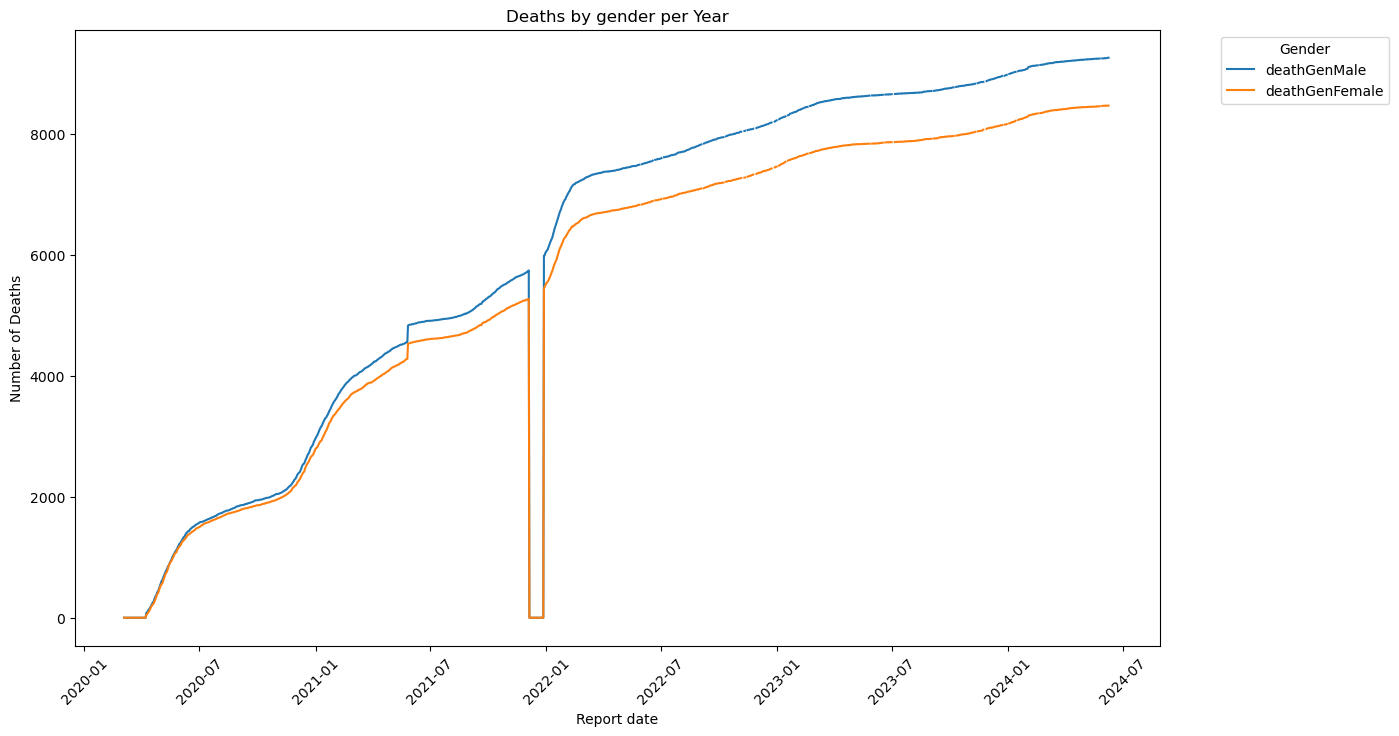

In [223]:
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting each county's death data
gender_type = ['deathGenMale','deathGenFemale']

for gender in gender_type:
    ax.plot(death_gender_df['ReportDate'], death_gender_df[gender], label=gender)

# Adding title and labels
plt.title('Deaths by gender per Year')
plt.xlabel('Report date')
plt.ylabel('Number of Deaths')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate x-axis labels and set custom x-ticks
plt.xticks(rotation=45)

plt.savefig("output/deathsby_gender-line.png")

# Display the plot
plt.show()

In [224]:
#saving to file
death_gender_df= death_gender_df.fillna(0)
death_gender_df.to_csv('output/deathsby_gender.csv',index = False)

### Maryland case and death trend by county

In [193]:
cases_county_df= df[['ReportDate','year','ALLE','ANNE','BALT','BCITY','CALV','CARO','CARR','CECI','CHAR','DORC','FRED','GARR','HARF','HOWA','KENT','MONT','PRIN','QUEE','SOME','STMA','TALB','WASH','WICO','WORC','UNKN']]
cases_county_df.tail()

,ReportDate,year,ALLE,ANNE,BALT,BCITY,CALV,CARO,CARR,CECI,...,MONT,PRIN,QUEE,SOME,STMA,TALB,WASH,WICO,WORC,UNKN
1556,2024-06-07,2024,23820,127129,183862,159674,15786,7724,29847,21964,...,261797,244815,9324,6552,25881,7778,42278,26598,11486,0
1557,2024-06-08,2024,23820,127133,183873,159680,15786,7724,29847,21965,...,261827,244830,9324,6552,25882,7778,42278,26598,11486,0
1558,2024-06-09,2024,23820,127133,183876,159685,15786,7724,29848,21965,...,261839,244838,9324,6553,25883,7778,42278,26600,11486,0
1559,2024-06-10,2024,23820,127134,183882,159688,15787,7724,29850,21965,...,261853,244843,9324,6553,25883,7778,42279,26600,11486,0
1560,2024-06-11,2024,23820,127145,183894,159698,15788,7725,29852,21966,...,261898,244877,9324,6553,25886,7778,42282,26603,11486,0


In [194]:
cases_county_df.to_csv('output/casesby_county.csv',index = False)

In [195]:
death_county_df= df[['ReportDate','year','deathALLE','deathANNE','deathBALT','deathBCITY','deathCALV','deathCARO','deathCARR','deathCECI','deathCHAR','deathDORC','deathFRED','deathGARR','deathHARF','deathHOWA','deathKENT','deathMONT','deathPRIN','deathQUEE','deathSOME','deathSTMA','deathTALB','deathWASH','deathWICO','deathWORC','deathUNKN']]
death_county_df.tail()

,ReportDate,year,deathALLE,deathANNE,deathBALT,deathBCITY,deathCALV,deathCARO,deathCARR,deathCECI,...,deathMONT,deathPRIN,deathQUEE,deathSOME,deathSTMA,deathTALB,deathWASH,deathWICO,deathWORC,deathUNKN
1556,2024-06-07,2024,414.0,1370.0,3062.0,2066.0,191.0,95.0,525.0,299.0,...,2575.0,2494.0,140.0,85.0,276.0,127.0,695.0,388.0,197.0,24
1557,2024-06-08,2024,414.0,1370.0,3064.0,2066.0,191.0,95.0,525.0,299.0,...,2575.0,2494.0,140.0,85.0,276.0,127.0,695.0,388.0,197.0,22
1558,2024-06-09,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1559,2024-06-10,2024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1560,2024-06-11,2024,414.0,1370.0,3064.0,2066.0,191.0,95.0,525.0,299.0,...,2575.0,2494.0,140.0,85.0,276.0,127.0,695.0,388.0,197.0,23


In [225]:
death_county_df= death_county_df.fillna(0)
death_county_df.to_csv('output/deathsby_county.csv',index = False)